In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
agrupados = pd.read_csv(r'D:\Blue EdTech\bootcamp\dados\full_grouped.csv')

In [4]:
agrupados

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


Observar os países sugeridos:
- Espanha
- Equador
- Chile
- México
- Argentina

In [5]:
paises = ['Mexico', 'Argentina', 'Ecuador', 'Chile', 'Spain']
query_paises = agrupados[agrupados['Country/Region'].isin(paises)]

In [6]:
query_paises

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas
35,2020-01-22,Chile,0,0,0,0,0,0,0,Americas
51,2020-01-22,Ecuador,0,0,0,0,0,0,0,Americas
111,2020-01-22,Mexico,0,0,0,0,0,0,0,Americas
157,2020-01-22,Spain,0,0,0,0,0,0,0,Europe
...,...,...,...,...,...,...,...,...,...,...
34975,2020-07-27,Argentina,167416,3059,72575,91782,4890,120,2057,Americas
35004,2020-07-27,Chile,347923,9187,319954,18782,2133,75,1859,Americas
35020,2020-07-27,Ecuador,81161,5532,34896,40733,467,17,0,Americas
35080,2020-07-27,Mexico,395489,44022,303810,47657,4973,342,8588,Americas


In [7]:
query_paises.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,72781.973404,5881.014894,45723.015957,21177.942553,1359.498936,95.991489,937.884043
std,101824.646759,10203.760263,75899.586339,26475.200141,2058.306640,213.575719,2310.326259
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1918.000000,-16298.000000
25%,18.500000,0.000000,1.000000,17.750000,0.000000,0.000000,0.000000
50%,15214.500000,470.500000,3433.000000,8144.500000,374.000000,9.000000,8.500000
75%,118839.750000,5217.750000,53901.750000,30695.250000,1985.750000,69.750000,1018.500000
max,395489.000000,44022.000000,319954.000000,101617.000000,13990.000000,1179.000000,41227.000000


In [8]:
print(
    f"Médias dos 5 países\n\n",
    f"Confirmados - {query_paises.Confirmed.mean():,.0f} mil\n".replace(',','.'),
    f"Mortos      - {query_paises.Deaths.mean():,.0f} mil\n".replace(',','.'),
    f"Recuperados - {query_paises.Recovered.mean():,.0f} mil\n".replace(',','.'),
    f"Ativos      - {query_paises.Active.mean():,.0f} mil\n".replace(',','.')
    )


Médias dos 5 países

 Confirmados - 72.782 mil
 Mortos      - 5.881 mil
 Recuperados - 45.723 mil
 Ativos      - 21.178 mil



In [9]:
mexico = query_paises[query_paises['Country/Region'] == 'Mexico']
argentina = query_paises[query_paises['Country/Region'] == 'Argentina']
ecuador = query_paises[query_paises['Country/Region'] == 'Ecuador']  
chile = query_paises[query_paises['Country/Region'] == 'Chile']
spain = query_paises[query_paises['Country/Region'] == 'Spain']

<function matplotlib.pyplot.show(close=None, block=None)>

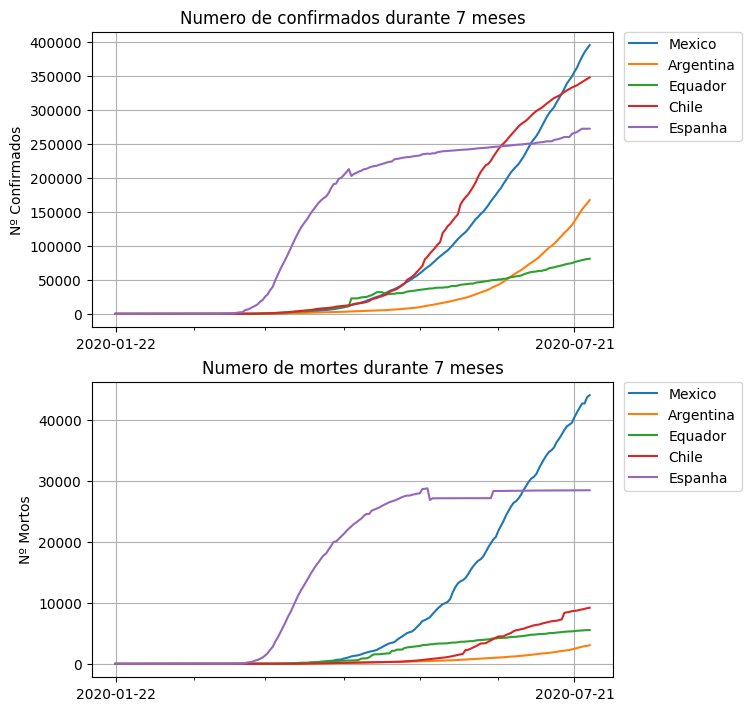

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(7.4, 7), constrained_layout=True)

# Ajustando data
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)

# Grafico de linhas - Confirmados
ax = axs[0]
ax.set_title(r'Numero de confirmados durante 7 meses')
ax.set_ylabel(r'Nº Confirmados')
ax.plot('Date', 'Confirmed', data=mexico, label= 'Mexico')
ax.plot('Date', 'Confirmed', data=argentina, label= 'Argentina')
ax.plot('Date', 'Confirmed', data=ecuador, label= 'Equador')
ax.plot('Date', 'Confirmed', data=chile, label= 'Chile')
ax.plot('Date', 'Confirmed', data=spain, label= 'Espanha')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Grafico de linhas - Mortes
ax = axs[1]
ax.set_title(r'Numero de mortes durante 7 meses')
ax.set_ylabel(r'Nº Mortos')
ax.plot('Date', 'Deaths', data=mexico, label= 'Mexico')
ax.plot('Date', 'Deaths', data=argentina, label= 'Argentina')
ax.plot('Date', 'Deaths', data=ecuador, label= 'Equador')
ax.plot('Date', 'Deaths', data=chile, label= 'Chile')
ax.plot('Date', 'Deaths', data=spain, label= 'Espanha')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show

In [11]:
query_paises_cem = query_paises.copy()

In [12]:
query_paises_cem['Deaths/100 Cases'] = query_paises['Deaths']/(query_paises['Confirmed']/100)
query_paises_cem['Recovered/100 Confirmed'] = query_paises['Recovered']/(query_paises['Confirmed']/100)

In [13]:
query_paises_cem.head(1)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Deaths/100 Cases,Recovered/100 Confirmed
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas,NaN,NaN


In [14]:
mexico_2 = query_paises_cem[query_paises_cem['Country/Region'] == 'Mexico']
argentina_2 = query_paises_cem[query_paises_cem['Country/Region'] == 'Argentina']
ecuador_2 = query_paises_cem[query_paises_cem['Country/Region'] == 'Ecuador']  
chile_2 = query_paises_cem[query_paises_cem['Country/Region'] == 'Chile']
spain_2 = query_paises_cem[query_paises_cem['Country/Region'] == 'Spain']

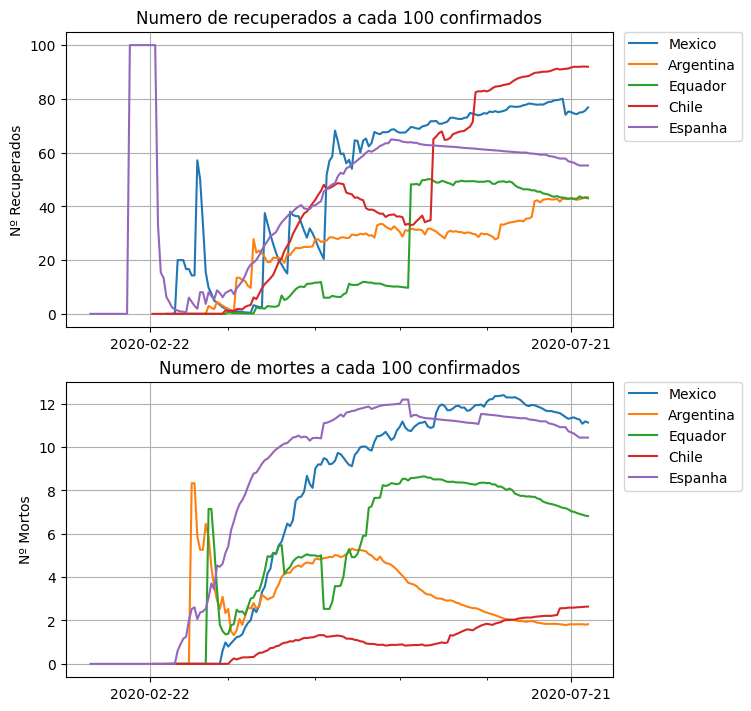

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(7.4, 7), constrained_layout=True)

# Ajustando data
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(2, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)

# Grafico de linhas - Confirmados
ax = axs[0]
ax.set_title(r'Numero de recuperados a cada 100 confirmados')
ax.set_ylabel(r'Nº Recuperados')
ax.plot('Date', 'Recovered/100 Confirmed', data=mexico_2, label= 'Mexico')
ax.plot('Date', 'Recovered/100 Confirmed', data=argentina_2, label= 'Argentina')
ax.plot('Date', 'Recovered/100 Confirmed', data=ecuador_2, label= 'Equador')
ax.plot('Date', 'Recovered/100 Confirmed', data=chile_2, label= 'Chile')
ax.plot('Date', 'Recovered/100 Confirmed', data=spain_2, label= 'Espanha')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Grafico de linhas - Mortes
ax = axs[1]
ax.set_title(r'Numero de mortes a cada 100 confirmados')
ax.set_ylabel(r'Nº Mortos')
ax.plot('Date', 'Deaths/100 Cases', data=mexico_2, label= 'Mexico')
ax.plot('Date', 'Deaths/100 Cases', data=argentina_2, label= 'Argentina')
ax.plot('Date', 'Deaths/100 Cases', data=ecuador_2, label= 'Equador')
ax.plot('Date', 'Deaths/100 Cases', data=chile_2, label= 'Chile')
ax.plot('Date', 'Deaths/100 Cases', data=spain_2, label= 'Espanha')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show()

## Serie Temporal

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

In [17]:
query_paises_cem.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,Deaths/100 Cases,Recovered/100 Confirmed
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas,NaN,NaN
35,2020-01-22,Chile,0,0,0,0,0,0,0,Americas,NaN,NaN
51,2020-01-22,Ecuador,0,0,0,0,0,0,0,Americas,NaN,NaN
111,2020-01-22,Mexico,0,0,0,0,0,0,0,Americas,NaN,NaN
157,2020-01-22,Spain,0,0,0,0,0,0,0,Europe,NaN,NaN


In [18]:
query_paises_cem['Date'] = pd.to_datetime(query_paises_cem.Date, format="%Y-%m-%d")

In [19]:
query_paises_cem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 6 to 35126
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     940 non-null    datetime64[ns]
 1   Country/Region           940 non-null    object        
 2   Confirmed                940 non-null    int64         
 3   Deaths                   940 non-null    int64         
 4   Recovered                940 non-null    int64         
 5   Active                   940 non-null    int64         
 6   New cases                940 non-null    int64         
 7   New deaths               940 non-null    int64         
 8   New recovered            940 non-null    int64         
 9   WHO Region               940 non-null    object        
 10  Deaths/100 Cases         781 non-null    float64       
 11  Recovered/100 Confirmed  781 non-null    float64       
dtypes: datetime64[ns](1), float64(2), 

In [20]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller # importar o teste ADF

sns.set_style()

#%config InlineBackend.figure_format = 'svg'


In [21]:
# observando numero de confirmados da Argentina utilizando o metodo adFuller
df = argentina_2.copy()
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df.set_index('Date', inplace=True)
# extrair apenas os valores
X = df.Confirmed.values

# aplicar ADF e imprimir o resultado
result = adfuller(X)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: 0.2191
Valor-p: 0.9733
Valores Críticos:
	1%: -3.4690
	5%: -2.8785
	10%: -2.5758


C:\Users\brodr\AppData\Local\Temp\ipykernel_8312\3279739102.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Country/Region', 'WHO Region'], dtype='object')
  ma = df.rolling(12).mean()


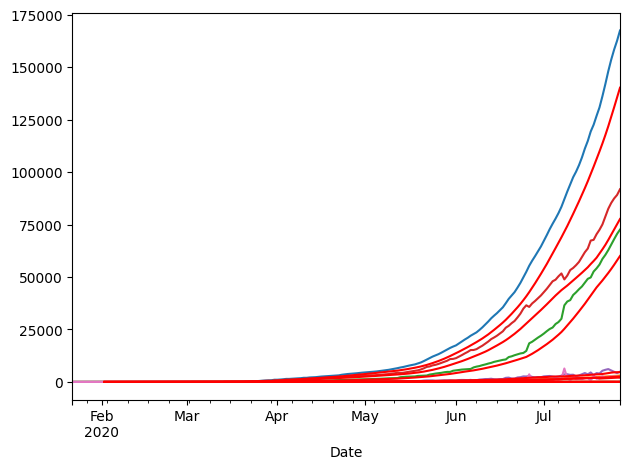

In [22]:
ma = df.rolling(12).mean()

fig, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

In [23]:
df.drop(['Country/Region', 'WHO Region'], axis=1, inplace=True)

C:\Users\brodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


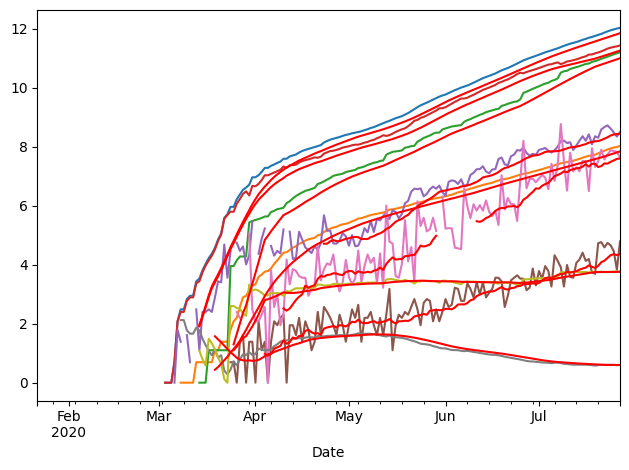

In [24]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

fig, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

### Forecast

In [25]:
#!pip3 install sktime

In [26]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

In [59]:
y = pd.Series(query_paises_cem['New cases'].values, query_paises_cem['Date'].values)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: >)

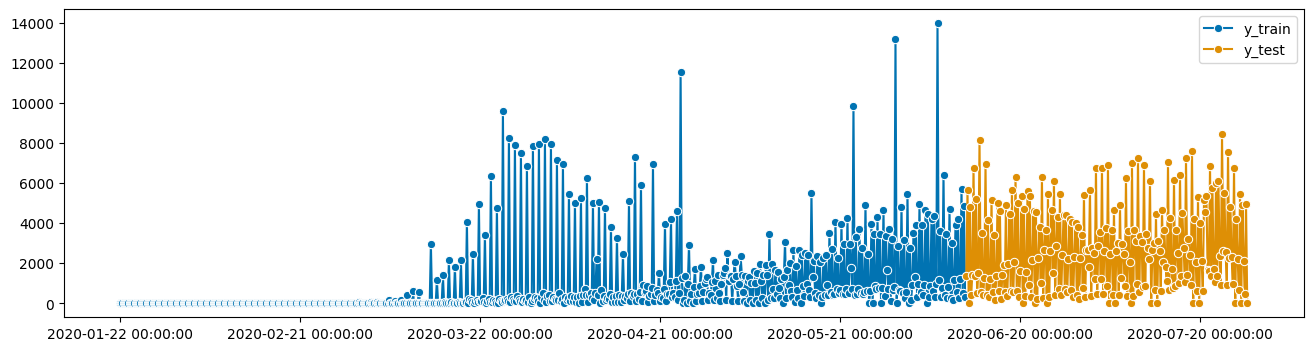

In [60]:
y_train, y_test = temporal_train_test_split(y)

plot_series(y_train, y_test, labels=["y_train", "y_test"])

Observando numeros de novos casos e obitos

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

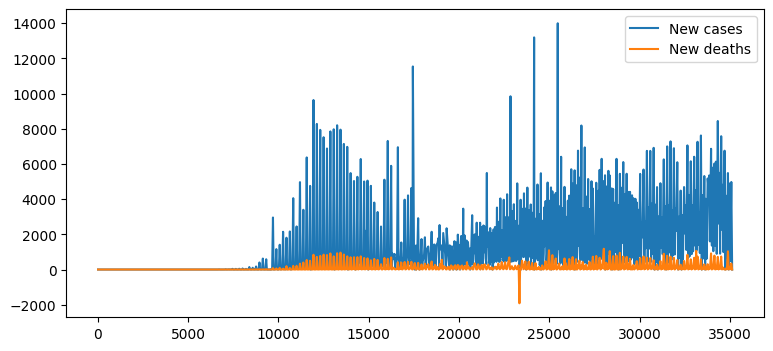

In [75]:
covid = query_paises_cem[['New cases','New deaths']]

covid.plot(figsize=(9,4))
plt.show()

Diferença entre os novos casos por dia

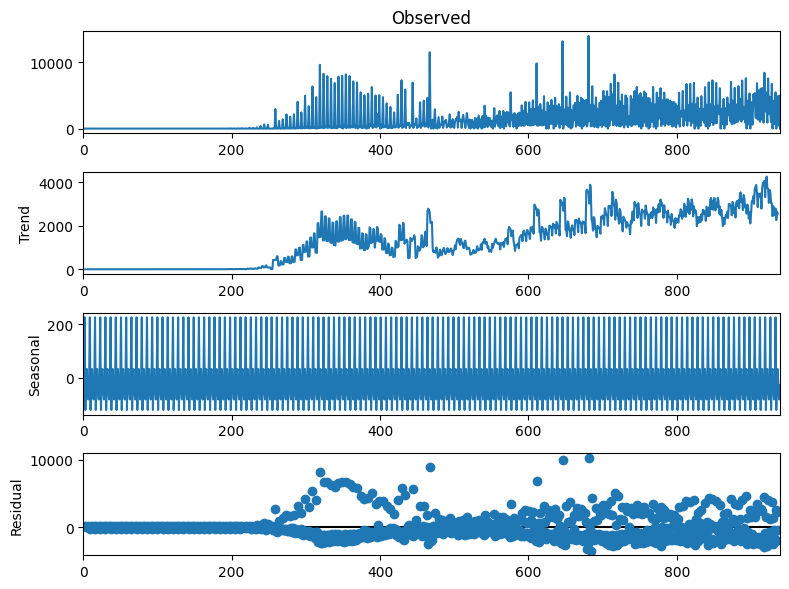

In [62]:
confirmados = np.array(y)

# decompor por semana
result = seasonal_decompose(confirmados, model='additive', period=7)

fig = result.plot()
fig.set_size_inches((8, 6))

fig.tight_layout()
plt.show()

In [ ]:
#!pip install pmdarima

In [33]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [63]:
# criando o modelo
auto_arima(covid['New cases'],seasonal=True,m=7).summary()

# ajustando o modelo
# colocamos os parametros start_p e start_q em 0 para
# serem os valores iniciais de treino e colocamos os 
# parametros max_p e max_q nos valores finais. 
# m=7 que será de observacoes diária
stepwise_fit = auto_arima(covid['New cases'], start_p=0, start_q=0, 
    max_p=6, max_q=3, m=7,
    seasonal=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=17519.376, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=17696.018, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=17164.382, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=17694.018, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=17170.874, Time=0.25 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=17084.491, Time=1.18 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=16930.207, Time=3.37 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=17068.265, Time=0.57 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=16740.685, Time=3.13 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=16932.776, Time=3.45 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=16661.226, Time=4.32 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=17297.347, Time=2.70 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=17025.094, Time=2.87 sec
 ARIMA(0,1,1)(2,0,2)[7] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  940
Model:             SARIMAX(6, 1, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -7812.491
Date:                                Fri, 02 Dec 2022   AIC                          15648.981
Time:                                        18:23:36   BIC                          15707.119
Sample:                                             0   HQIC                         15671.145
                                                - 940                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0658      0.067     -0.978      0.328      -0.198       0.066
ar.L2         -0.2108      0.036     -5.889      0.000      -0.281      -0.141
ar.L3         -0.1325      0.048     -2.785      0.005      -0.226      -0.039
ar.L4         -0.1369      0.054     -2.536      0.011      -0.243      -0.031
ar.L5          0.5595      0.039     14.221      0.000       0.482       0.637
ar.L6         -0.0750      0.061     -1.221      0.222      -0.195       0.045
ma.L1         -0.9501      0.022    -44.086      0.000      -0.992      -0.908
ar.S.L7        0.6284      0.032     19.671      0.000       0.566       0.691
ar.S.L14      -0.9396      0.026    -36.649      0.000      -0.990      -0.889
ma.S.L7       -0.5477      0.054    -10.208      0.000      -0.653      -0.443
ma.S.L14       0.7981      0.049     16.450      0.000       0.703       0.893
sigma2       1.12e+06   2.35e+04     47.665      0.000    1.07e+06    1.17e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):             54439.23
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               8.51   Skew:                             2.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
cut = int(covid.shape[0] * 0.80)
train = covid.iloc[:cut]
test = covid.iloc[cut:]

# modelo
model = SARIMAX(train['New cases'],order=(6,1,1),seasonal_order=(2,0,[1,2],7))
model_fit = model.fit()
model_fit.summary()

C:\Users\brodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\brodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\brodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\brodr\AppData\Local\Packages\PythonSoftwar

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                              New cases   No. Observations:                  752
Model:             SARIMAX(6, 1, 1)x(2, 0, [1, 2], 7)   Log Likelihood               -6279.807
Date:                                Fri, 02 Dec 2022   AIC                          12583.614
Time:                                        18:25:33   BIC                          12639.071
Sample:                                             0   HQIC                         12604.981
                                                - 752                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0849      0.095     -0.898      0.369      -0.270       0.100
ar.L2         -0.2033      0.047     -4.306      0.000      -0.296      -0.111
ar.L3         -0.1543      0.047     -3.269      0.001      -0.247      -0.062
ar.L4         -0.1724      0.064     -2.704      0.007      -0.297      -0.047
ar.L5          0.5757      0.047     12.264      0.000       0.484       0.668
ar.L6         -0.1119      0.090     -1.236      0.216      -0.289       0.066
ma.L1         -0.9442      0.029    -33.082      0.000      -1.000      -0.888
ar.S.L7        0.3266      0.055      5.989      0.000       0.220       0.434
ar.S.L14      -0.8679      0.059    -14.602      0.000      -0.984      -0.751
ma.S.L7       -0.1783      0.054     -3.313      0.001      -0.284      -0.073
ma.S.L14       0.9087      0.050     18.074      0.000       0.810       1.007
sigma2      1.229e+06   3.54e+04     34.734      0.000    1.16e+06     1.3e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):             41168.61
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):            1554.76   Skew:                             3.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Decomposição da serie temporal

C:\Users\brodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


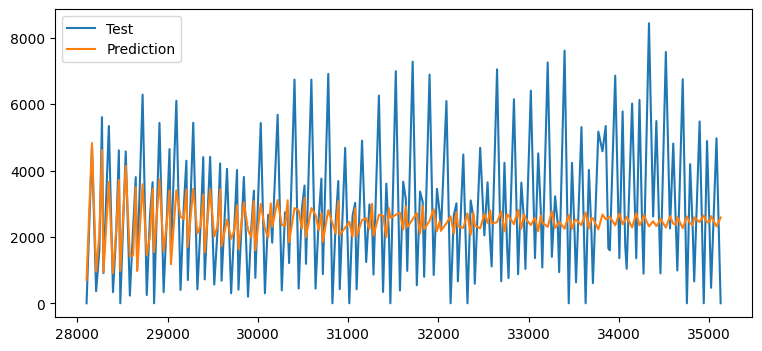

In [73]:
start = train.shape[0]
end   = covid.shape[0] - 1

pred = model_fit.predict(start=start, end=end, dynamic=False, typ='levels')
pred.index = test.index

plt.figure(figsize=(14,10))
test['New cases'].plot(legend=True, label='Test')
pred.plot(legend=True, label='Prediction', figsize=(9,4))
plt.show()

Comparando a serie verdadeira com a serie predita

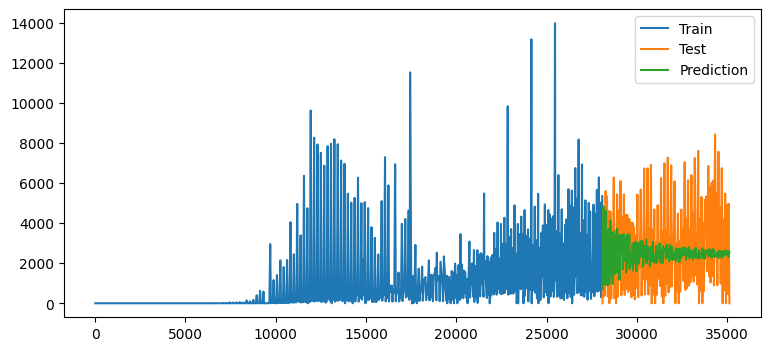

In [74]:
plt.figure(figsize=(14,10))
train['New cases'].plot(legend=True, label='Train')
test['New cases'].plot(legend=True, label='Test')
pred.plot(legend=True, label='Prediction', figsize=(9,4))
plt.show()